In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import random
import time
import scipy.stats as st

# API Key
from config import weather_api_key

In [28]:
#Define functions

def random_city():
    
    lat_range = (-90, 90)
    long_range = (-180, 180)
    lats = np.random.uniform(lat_range[0], lat_range[1])
    longs = np.random.uniform(long_range[0], long_range[1])
    city = citipy.nearest_city(lats,longs).city_name
    return city

def get_weather(city):
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = base_url + 'appid=' + weather_api_key + '&q=' + city +'&units=imperial'
    weather_data = requests.get(query_url).json()
    return weather_data

In [39]:
#Generate City List

# List for holding cities
i = 1
city_list = []


# Identify nearest city for each latitude, longitude combination
while i <= 600:
    city = random_city()
    
    # If the city is unique, then add it to a our cities list
    if city not in city_list:
        city_list.append(city)
        print(f"Adding {i}:{city}...")
        i += 1

Adding 1:nizhneyansk...
Adding 2:manakara...
Adding 3:lucapa...
Adding 4:cherskiy...
Adding 5:belushya guba...
Adding 6:hasaki...
Adding 7:cape town...
Adding 8:thompson...
Adding 9:mahebourg...
Adding 10:talnakh...
Adding 11:vaitape...
Adding 12:ushuaia...
Adding 13:deputatskiy...
Adding 14:tsihombe...
Adding 15:butaritari...
Adding 16:lavrentiya...
Adding 17:yellowknife...
Adding 18:jamestown...
Adding 19:mar del plata...
Adding 20:hilo...
Adding 21:albany...
Adding 22:vaitupu...
Adding 23:bluff...
Adding 24:mataura...
Adding 25:camacha...
Adding 26:rikitea...
Adding 27:manono...
Adding 28:koslan...
Adding 29:ouadda...
Adding 30:bambous virieux...
Adding 31:labuhan...
Adding 32:vanavara...
Adding 33:taolanaro...
Adding 34:sibu...
Adding 35:alice springs...
Adding 36:labytnangi...
Adding 37:san patricio...
Adding 38:sajkas...
Adding 39:new norfolk...
Adding 40:jiddah...
Adding 41:krutinka...
Adding 42:illoqqortoormiut...
Adding 43:balkanabat...
Adding 44:sinesti...
Adding 45:kandava..

In [54]:
len(city_list)

600

In [66]:
city_df = pd.DataFrame(city_list, columns = ['City Name'])
city_df['Country'] = ''
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Temperature (F)'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed (MPH)'] = ''
city_df['Time of Data Calculation'] = ''

In [67]:
city_df.head(10)

,City Name,Country,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (MPH),Time of Data Calculation
0,nizhneyansk,,,,,,,,
1,manakara,,,,,,,,
2,lucapa,,,,,,,,
3,cherskiy,,,,,,,,
4,belushya guba,,,,,,,,
5,hasaki,,,,,,,,
6,cape town,,,,,,,,
7,thompson,,,,,,,,
8,mahebourg,,,,,,,,
9,talnakh,,,,,,,,


In [68]:
for index, row in city_df.iterrows():
    data = get_weather(city_df.loc[index, 'City Name'])
    try:
        city_df.loc[index, 'Country'] = data['sys']['country']
        city_df.loc[index, 'Latitude'] = data['coord']['lat']
        city_df.loc[index, 'Longitude'] = data['coord']['lon']
        city_df.loc[index, 'Temperature (F)'] = data['main']['temp']
        city_df.loc[index, 'Humidity'] = data['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = data['clouds']['all']
        city_df.loc[index, 'Wind Speed (MPH)'] = data['wind']['speed']
        city_df.loc[index, 'Time of Data Calculation'] = data['dt']
    except:
        print(f'No Weather Data for Row Number {index}...')

No Weather Data for Row Number 0...
No Weather Data for Row Number 4...
No Weather Data for Row Number 13...
No Weather Data for Row Number 21...
No Weather Data for Row Number 32...
No Weather Data for Row Number 39...
No Weather Data for Row Number 41...
No Weather Data for Row Number 52...
No Weather Data for Row Number 59...
No Weather Data for Row Number 66...
No Weather Data for Row Number 75...
No Weather Data for Row Number 79...
No Weather Data for Row Number 82...
No Weather Data for Row Number 86...
No Weather Data for Row Number 90...
No Weather Data for Row Number 98...
No Weather Data for Row Number 116...
No Weather Data for Row Number 157...
No Weather Data for Row Number 172...
No Weather Data for Row Number 180...
No Weather Data for Row Number 228...
No Weather Data for Row Number 248...
No Weather Data for Row Number 250...
No Weather Data for Row Number 269...
No Weather Data for Row Number 272...
No Weather Data for Row Number 278...
No Weather Data for Row Number

In [78]:
city_df = city_df.loc[city_df['Longitude'] != '']

In [79]:
city_df['Time of Data Calculation'] = pd.to_datetime(city_df['Time of Data Calculation'], unit='s')

In [80]:
city_df.to_csv("../output_data/city_data.csv", index=False, header=True)

In [81]:
cities_df = pd.read_csv("../output_data/city_data.csv")
cities_df

,City Name,Country,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (MPH),Time of Data Calculation
0,manakara,MG,-22.13,48.02,69.48,87,66,5.26,2020-10-19 23:59:30
1,lucapa,AO,-8.42,20.74,66.42,89,7,2.82,2020-10-20 00:05:17
2,cherskiy,RU,68.75,161.30,20.59,94,7,3.80,2020-10-19 23:58:53
3,hasaki,JP,35.73,140.83,58.30,87,75,9.17,2020-10-19 23:58:49
4,cape town,ZA,-33.93,18.42,56.44,93,20,5.82,2020-10-20 00:03:49
...,...,...,...,...,...,...,...,...,...
550,poum,NC,-20.23,164.02,75.20,70,0,8.32,2020-10-20 00:06:19
551,calabozo,VE,8.92,-67.43,76.95,88,42,1.32,2020-10-20 00:06:19
552,ercis,TR,39.03,43.36,41.00,60,5,3.36,2020-10-20 00:06:19
553,mogadishu,SO,2.04,45.34,78.64,85,3,11.12,2020-10-20 00:05:11


In [82]:
north_hem = cities_df.loc[cities_df['Latitude'] >= 0]
south_hem = cities_df.loc[cities_df['Latitude']< 0]

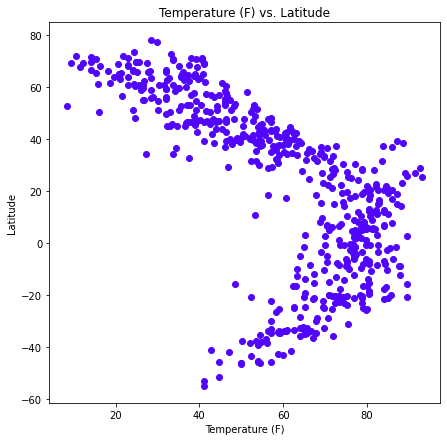

In [83]:
#Temperature (F) vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(cities_df['Temperature (F)'], cities_df['Latitude'],  color='#5205FC')

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("../graphs/temp_v_lat.png")
plt.show()

The code is taking the temperature value of cities in the dataframe and assigning that to the x value and using the latitude to get the y value on the graph. A trend in warmer temperatures near the equator is being shown.

The correlation between temperature (F) and latitude is: 0.76


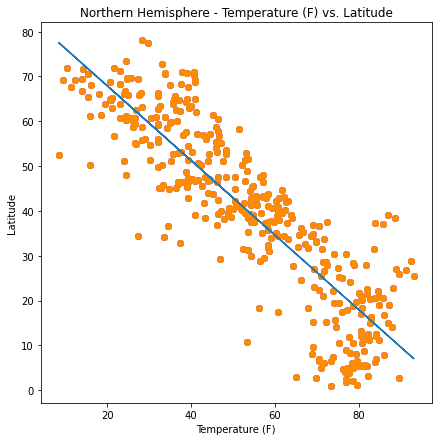

In [84]:
#Northern Hemisphere - Temperature (F) vs. Latitude

plt.figure(figsize=(7,7))
plt.scatter(north_hem['Temperature (F)'], north_hem['Latitude'],  color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Temperature (F)'], north_hem['Latitude'])
regress_values = north_hem['Temperature (F)'] * slope + intercept

print(f"The correlation between temperature (F) and latitude is: {round(rvalue**2,2)}")
plt.scatter(north_hem['Temperature (F)'], north_hem['Latitude'],  color='darkorange')
plt.plot(north_hem['Temperature (F)'],regress_values)

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel('Temperature (F)')
plt.ylabel("Latitude")

plt.savefig("../graphs/NH_temp_v_lat.png")
plt.show()

The correlation between temperature (F) and latitude is: 0.56


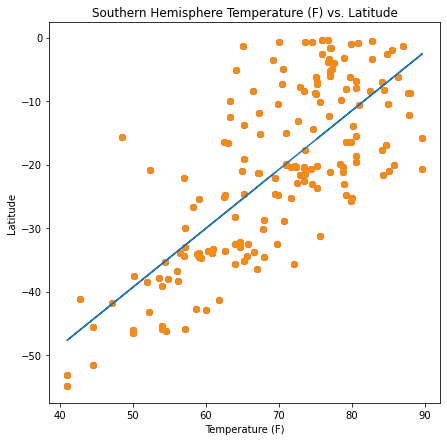

In [85]:
#Southern Hemisphere - Temperature (F) vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(south_hem['Temperature (F)'], south_hem['Latitude'],  color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Temperature (F)'], south_hem['Latitude'])
regress_values = south_hem['Temperature (F)'] * slope + intercept

print(f"The correlation between temperature (F) and latitude is: {round(rvalue**2,2)}")
plt.scatter(south_hem['Temperature (F)'], south_hem['Latitude'],  color='darkorange')
plt.plot(south_hem['Temperature (F)'],regress_values)

plt.title("Southern Hemisphere Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("../graphs/SH_temp_v_lat.png")
plt.show()

With r-values of 0.76 and 0.49 you can draw the conclusion that there is a strong to moderate correlation for temperate vs latitude in the Northern and Southern hemispheres. 

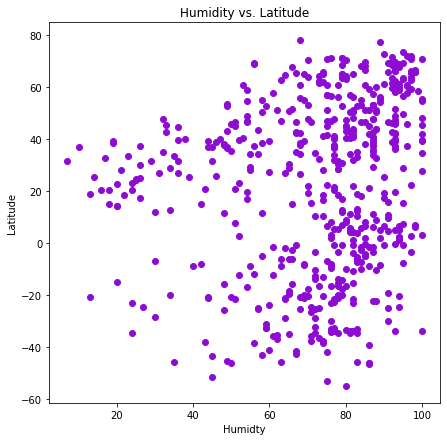

In [86]:
#Humidity vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(cities_df['Humidity'], cities_df['Latitude'],  color='#8E0BD4')

plt.title("Humidity vs. Latitude")
plt.xlabel("Humidty")
plt.ylabel("Latitude")

plt.savefig("../graphs/humidity_v_lat.png")
plt.show()

The code is being used to determine visually if there is a correlation between a city's latitude and that city's humidity. Without doing the math there doesn't appear to be one.

The correlation between humidity and latitude is: 0.05


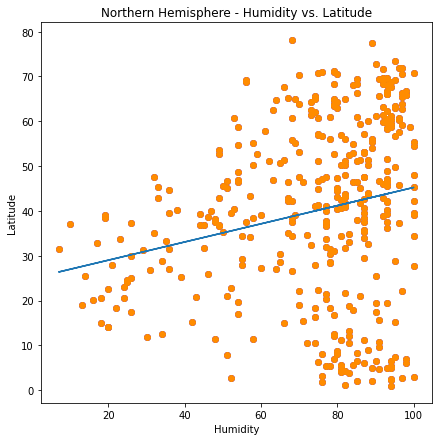

In [87]:
#Northern Hemisphere - Humidty vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(north_hem['Humidity'], north_hem['Latitude'], color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Humidity'], north_hem['Latitude'])
regress_values = north_hem['Humidity'] * slope + intercept

print(f"The correlation between humidity and latitude is: {round(rvalue**2,2)}")
plt.scatter(north_hem['Humidity'], north_hem['Latitude'],  color='darkorange')
plt.plot(north_hem['Humidity'],regress_values)

plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

plt.savefig("../graphs/NH_humidity_v_lat.png")
plt.show()

The correlation between humidity and latitude is: 0.03


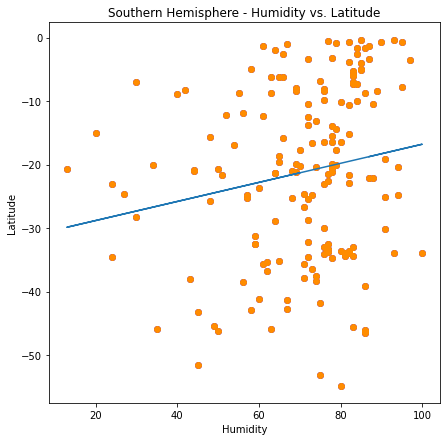

In [88]:
#Southern Hemisphere - Humidty vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(south_hem['Humidity'], south_hem['Latitude'],  color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Humidity'], south_hem['Latitude'])
regress_values = south_hem['Humidity'] * slope + intercept

print(f"The correlation between humidity and latitude is: {round(rvalue**2,2)}")
plt.scatter(south_hem['Humidity'], south_hem['Latitude'],  color='darkorange')
plt.plot(south_hem['Humidity'],regress_values)

plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

plt.savefig("../graphs/SH_humidity_v_lat.png")
plt.show()

When a linear regression is applied to both scatter plots it confirms that there is no correlation between humidity and latitude in the Southern Hemisphere and slight on in the Northern Hemisphere.

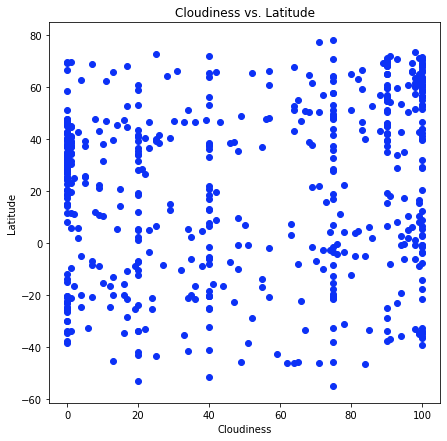

In [89]:
#Cloudiness vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(cities_df['Cloudiness'], cities_df['Latitude'],  color='#0C31F6')

plt.title("Cloudiness vs. Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

plt.savefig("../graphs/cloud_v_lat.png")
plt.show()

The code reading the cloudiness value from the dataframe and plotting it along with the latitude. Cloudiness being the x and latitude the y. There's a fairly uniform distribution on the scatter plot initially indicating no strong correlation.

The correlation between cloudiness and latitude is: 0.09


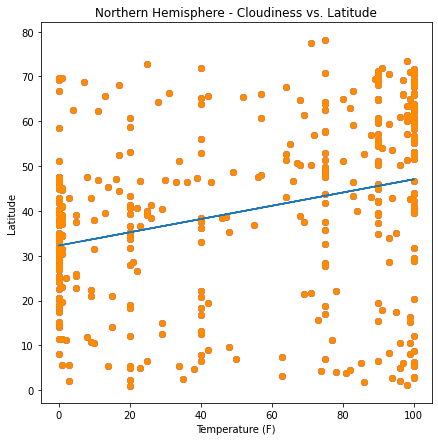

In [90]:
#Northern Hemisphere - Cloudiness vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(north_hem['Cloudiness'], north_hem['Latitude'], color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Cloudiness'], north_hem['Latitude'])
regress_values = north_hem['Cloudiness'] * slope + intercept

print(f"The correlation between cloudiness and latitude is: {round(rvalue**2,2)}")
plt.scatter(north_hem['Cloudiness'], north_hem['Latitude'],  color='darkorange')
plt.plot(north_hem['Cloudiness'],regress_values)

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("../graphs/NH_cloud_v_lat.png")
plt.show()

The correlation between cloudiness and latitude is: 0.0


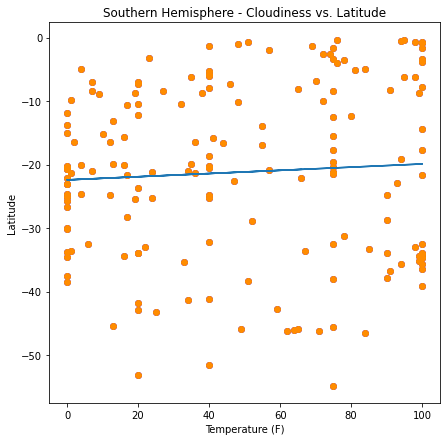

In [91]:
#Southern Hemisphere - Cloudiness vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(south_hem['Cloudiness'], south_hem['Latitude'],  color='#5205FC')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Cloudiness'], south_hem['Latitude'])
regress_values = south_hem['Cloudiness'] * slope + intercept

print(f"The correlation between cloudiness and latitude is: {round(rvalue**2,2)}")
plt.scatter(south_hem['Cloudiness'], south_hem['Latitude'],  color='darkorange')
plt.plot(south_hem['Cloudiness'],regress_values)

plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("../graphs/SH_cloud_v_lat.png")
plt.show()

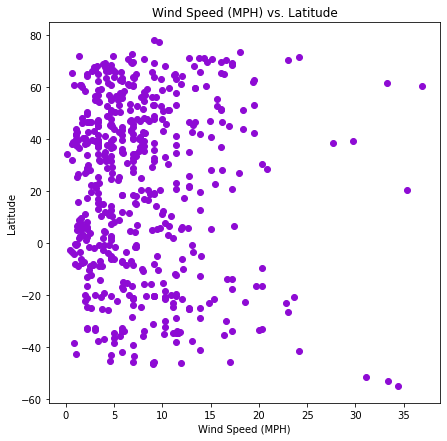

In [92]:
#Wind Speed (mph) vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(cities_df['Wind Speed (MPH)'], cities_df['Latitude'],  color='#8E0BD4')

plt.title("Wind Speed (MPH) vs. Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")

plt.savefig("../graphs/wind_v_lat.png")
plt.show()

The code reading the wind speed value from the dataframe and plotting it along with the latitude. Wind Speed being the x and latitude the y. There doesn't appear to a strong correlation between the two variables.

The correlation between wind speed (MPH) and latitude is: 0.03


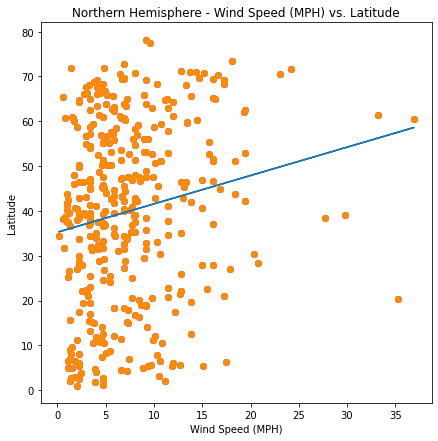

In [93]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(north_hem['Wind Speed (MPH)'], north_hem['Latitude'],  color='#8E0BD4')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hem['Wind Speed (MPH)'], north_hem['Latitude'])
regress_values = north_hem['Wind Speed (MPH)'] * slope + intercept

print(f"The correlation between wind speed (MPH) and latitude is: {round(rvalue**2,2)}")
plt.scatter(north_hem['Wind Speed (MPH)'], north_hem['Latitude'],  color='darkorange')
plt.plot(north_hem['Wind Speed (MPH)'],regress_values)

plt.title("Northern Hemisphere - Wind Speed (MPH) vs. Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")

plt.savefig("../graphs/NH_wind_v_lat.png")
plt.show()

The correlation between wind speed (MPH) and latitude is: 0.14


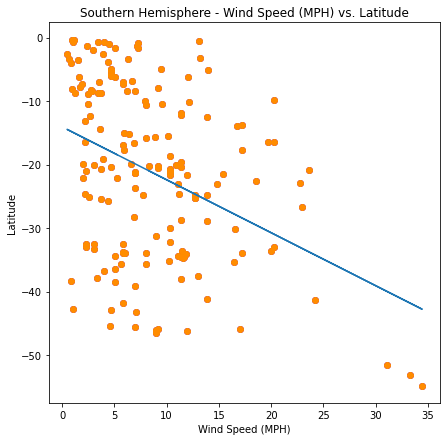

In [94]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
plt.figure(figsize=(7,7))
plt.scatter(south_hem['Wind Speed (MPH)'], south_hem['Latitude'],  color='#8E0BD4')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hem['Wind Speed (MPH)'], south_hem['Latitude'])
regress_values = south_hem['Wind Speed (MPH)'] * slope + intercept

print(f"The correlation between wind speed (MPH) and latitude is: {round(rvalue**2,2)}")
plt.scatter(south_hem['Wind Speed (MPH)'], south_hem['Latitude'],  color='darkorange')
plt.plot(south_hem['Wind Speed (MPH)'],regress_values)

plt.title("Southern Hemisphere - Wind Speed (MPH) vs. Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")

plt.savefig("../graphs/SH_wind_v_lat.png")
plt.show()

There is a slight correlation in the two scatter plots that show the further you get away from the equator the faster the wind speeds are.

# Observable Trends
1) The closer you get to the equator the higher the temperature gets. This has to do with how heat from the sun hits the Earth's surface. Due to the curvature of the Earth latitudes near the equator tend to receive more direct energy from the Sun.

2) Wind speed is slightly higher the further away you get from the equator. This is realted to how the surface of the Earth is heated with locations closer to the equator being generally warmer.

3) There is not correlation between latitude and cloudiness. The variables that create cloudiness rely on more than just where the latitude a city is located at.